In [ ]:
pip install riskfolio-lib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.6/307.6 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 35.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 44.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 53.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.4/983.4 kB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.0/235.0 kB 19.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: cvxpy
    Found existing installation: cvxpy 1.3.4
    Uninstalling cvxpy-1.3.4:
      Successfully uninstalled cvxpy-1.3.4


In [ ]:
import pandas as pd
import yfinance as yf
import riskfolio as rp


In [ ]:
# Define the list of NASDAQ tickers to consider
nasdaq_tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'CTSH', 'JNJ', 'V', 'JPM', 'PG', 'BRK-B']

# Define the date range for historical data
start_date = '2014-01-01'
end_date = '2024-01-01'

stocks = yf.download(nasdaq_tickers, start=start_date, end=end_date)['Close']
# Fetch historical price data for each ticker
prices = yf.download(nasdaq_tickers, start=start_date, end=end_date)['Adj Close']

# Calculate returns over a specified period (e.g., 12 months)
returns = prices.pct_change(252) * 100  # 252 trading days in a year

# Calculate momentum for each stock (e.g., average annualized return over the past 12 months)
momentum = returns.mean()

# Rank stocks based on momentum (higher momentum = higher rank)
ranked_assets = momentum.sort_values(ascending=False)

# Select the top 10 assets with the highest momentum for trading
top_assets = ranked_assets.head(10)


[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  10 of 10 completed


In [ ]:
top_assets

Ticker
AAPL     30.864747
AMZN     30.533860
MSFT     28.830468
GOOGL    20.083380
V        19.236284
JPM      16.460079
BRK-B    12.123527
PG       10.914306
JNJ       8.674506
CTSH      6.373049
dtype: float64

In [ ]:

# Define initial investment amount and number of shares to buy for each asset
initial_investment = 18000  # USD
number_of_assets = len(top_assets)
investment_per_asset = initial_investment / number_of_assets

# Buy and hold strategy: Invest equally in each selected asset
portfolio_value = 0
for asset, momentum_score in top_assets.items():
    asset_price = prices[asset].iloc[-623]  # Get the latest price
    shares_to_buy = int(investment_per_asset / asset_price)
    asset_value = shares_to_buy * (prices[asset].iloc[-1])
    portfolio_value += asset_value
    print(asset,asset_price,shares_to_buy,asset_value,portfolio_value)

# Display portfolio value
print("Portfolio Value after 12 months (Buy and Hold Strategy): $", portfolio_value)


AAPL 142.07176208496094 12 2304.2902221679688 2304.2902221679688
AMZN 185.92750549316406 9 1367.4600219726562 3671.750244140625
MSFT 270.32574462890625 6 2248.0204467773438 5919.770690917969
GOOGL 126.97550201416016 14 1955.6600341796875 7875.430725097656
V 232.6291046142578 7 1815.6978454589844 9691.12857055664
JPM 146.08311462402344 12 2016.9254150390625 11708.053985595703
BRK-B 280.1099853515625 6 2139.9600219726562 13848.01400756836
PG 127.25955963134766 14 2025.6051330566406 15873.619140625
JNJ 155.84133911132812 11 1697.4269256591797 17571.04606628418
CTSH 66.07486724853516 27 2022.8028717041016 19593.84893798828
Portfolio Value after 12 months (Buy and Hold Strategy): $ 19593.84893798828


In [ ]:
data = prices
data.columns = nasdaq_tickers
stk1= stocks
stk1.columns = nasdaq_tickers


In [ ]:
data.head()

,AAPL,MSFT,GOOGL,AMZN,CTSH,JNJ,V,JPM,PG,BRK-B
Date,,,,,,,,,,
2014-01-02,17.273232,19.898500,117.500000,44.873653,27.855856,68.264900,43.791935,31.176825,59.643753,51.331989
2014-01-03,16.893808,19.822001,117.570000,44.637581,27.652653,68.879814,44.130474,30.967081,59.577091,51.366833
2014-01-06,16.985935,19.681499,116.279999,44.433277,27.960960,69.239769,44.386265,30.312668,59.717819,51.057926
2014-01-07,16.864456,19.901501,116.190002,45.000778,28.500000,70.709579,43.874691,30.547588,60.295444,51.448135
2014-01-08,16.971254,20.096001,115.339996,45.377594,28.559309,70.612114,44.288452,30.002241,59.421555,51.613041


In [ ]:
# Calculate assets' returns

Y = data[nasdaq_tickers].pct_change().dropna()

display(Y.head())

,AAPL,MSFT,GOOGL,AMZN,CTSH,JNJ,V,JPM,PG,BRK-B
Date,,,,,,,,,,
2014-01-03,-0.021966,-0.003845,0.000596,-0.005261,-0.007295,0.009008,0.007731,-0.006728,-0.001118,0.000679
2014-01-06,0.005453,-0.007088,-0.010972,-0.004577,0.011149,0.005226,0.005796,-0.021133,0.002362,-0.006014
2014-01-07,-0.007152,0.011178,-0.000774,0.012772,0.019278,0.021228,-0.011525,0.007750,0.009673,0.007642
2014-01-08,0.006333,0.009773,-0.007316,0.008374,0.002081,-0.001378,0.009431,-0.017852,-0.014493,0.003205
2014-01-09,-0.012770,-0.002264,-0.000173,-0.004202,-0.009630,0.006054,-0.001868,-0.006432,0.002243,-0.001395


In [ ]:

import riskfolio as rp

# Building the portfolio object
port = rp.Portfolio(returns=Y)

# Estimate input parameters:
method_mu='hist' # Selected method to estimate expected returns based on historical data.
method_cov='hist' # Selected method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu,
                  method_cov=method_cov,
                  d=0.94)

# Estimate optimal portfolio:
# model: could be Classic (historical), BL (Black Litterman),
# FM (Factor Model) or BLFM ( Black Litterman with Factor Models)
model = 'Classic'
# rm: Risk measure
rm = 'MAD'
# obj: Objective Function, could be MinRisk, MaxRet, Utility or Sharpe
obj = 'Sharpe'
# hist: Use historical scenarios for risk measures based on scenarios,
# only used when model is FM or BLFM
hist = True # Use historical scenarios for risk measures that depend on scenarios
# rf: Risk free rate
rf = 0
# l: Risk aversion factor, only useful when obj is 'Utility'
l = 0

w = port.optimization(model=model,
                      rm=rm,
                      obj=obj,
                      rf=rf,
                      l=l,
                      hist=hist)

display(w)

,weights
AAPL,2.617791e-01
MSFT,3.106367e-02
GOOGL,1.057978e-10
AMZN,8.543418e-12
CTSH,2.605381e-12
JNJ,6.330875e-02
V,1.093327e-01
JPM,3.630381e-01
PG,1.286369e-01
BRK-B,4.284073e-02


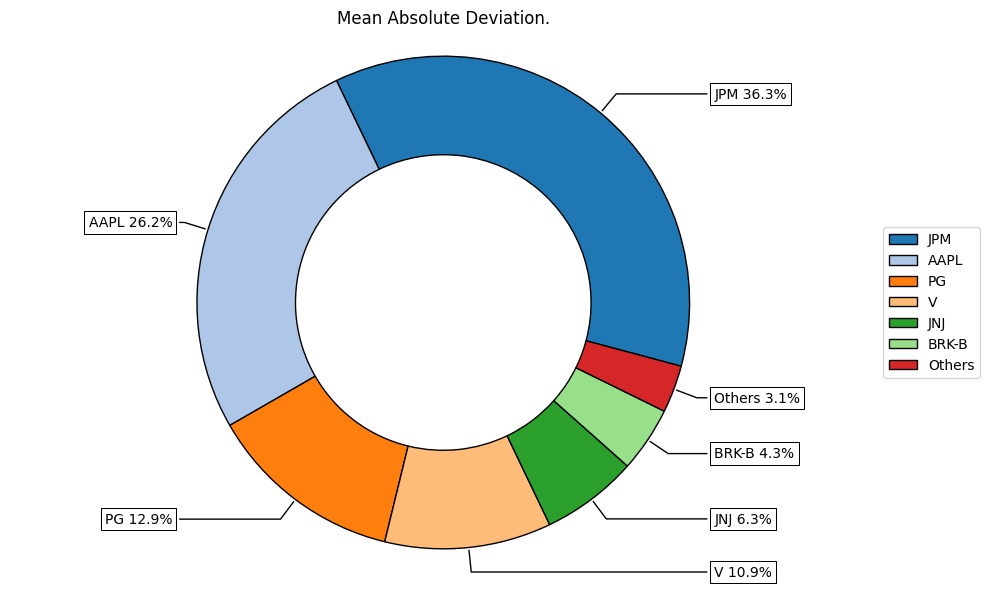

In [ ]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w, title='Mean Absolute Deviation.', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

In [ ]:
import pandas as pd

percent = ['AAPL:26.2', 'JPM:36.3', 'PG:12.9', 'V:10.9', 'JNJ:6.3', 'BRK-B:4.3','MSFT:1.6','CTSH:1.5']

df = pd.DataFrame([x.split(':') for x in percent], columns=['stock', 'percentage'])

In [ ]:
df

,stock,percentage
0,AAPL,26.2
1,JPM,36.3
2,PG,12.9
3,V,10.9
4,JNJ,6.3
5,BRK-B,4.3
6,MSFT,1.6
7,CTSH,1.5


In [ ]:
# prompt: Using dataframe df: from the data frame create a new column amount that splits 100000 with the percentage value of respective stock

df['amount'] = 100000 * df['percentage'].str.strip('%').astype(float) / 100


In [ ]:
stk1[1:2]

,AAPL,MSFT,GOOGL,AMZN,CTSH,JNJ,V,JPM,PG,BRK-B
Date,,,,,,,,,,
2014-01-03,19.320715,19.822001,117.57,49.16,27.652653,91.849998,58.66,36.91,80.449997,55.290001


In [ ]:
inistockprice=[19.320715, 36.91,	80.449997,58.66, 91.849998,55.290001,	19.822001,27.652653]

In [ ]:
stocklist = ['AAPL', 'JPM', 'PG', 'V', 'JNJ', 'BRK-B','MSFT','CTSH']
stocklist

['AAPL', 'JPM', 'PG', 'V', 'JNJ', 'BRK-B', 'MSFT', 'CTSH']

In [ ]:
for i in inistockprice:
  df['TotalStock'] = df['amount'].astype(float) / i

In [ ]:
df

,stock,percentage,amount,TotalStock
0,AAPL,26.2,26200.0,947.467861
1,JPM,36.3,36300.0,1312.713106
2,PG,12.9,12900.0,466.501352
3,V,10.9,10900.0,394.175561
4,JNJ,6.3,6300.0,227.826241
5,BRK-B,4.3,4300.0,155.500451
6,MSFT,1.6,1600.0,57.860633
7,CTSH,1.5,1500.0,54.244343


In [ ]:
# prompt: get the stock price of end date of each stock in list stocklist

stk1[-1:]

,AAPL,MSFT,GOOGL,AMZN,CTSH,JNJ,V,JPM,PG,BRK-B
Date,,,,,,,,,,
2023-12-29,192.529999,151.940002,356.660004,75.529999,139.690002,156.740005,170.100006,376.040009,146.539993,260.350006


In [ ]:
stocklist

In [ ]:
finstockprice=[192.529999	,376.040009,146.539993	,170.100006	,156.740005	,260.350006,151.940002	,139.690002]

In [ ]:
for i in finstockprice:
  df['OwnedStock'] = df['TotalStock'].round().astype(int)

In [ ]:
for i in finstockprice:
  df['Final_return_Amount'] = df['TotalStock'].round().astype(int) * i

In [ ]:
df.Final_return_Amount.sum()

505258.73723399994

In [ ]:
df

,stock,percentage,amount,TotalStock,Final_return_Amount,OwnedStock
0,AAPL,26.2,26200.0,947.467861,132286.431894,947
1,JPM,36.3,36300.0,1312.713106,183412.972626,1313
2,PG,12.9,12900.0,466.501352,65235.230934,467
3,V,10.9,10900.0,394.175561,55037.860788,394
4,JNJ,6.3,6300.0,227.826241,31849.320456,228
5,BRK-B,4.3,4300.0,155.500451,21791.640312,156
6,MSFT,1.6,1600.0,57.860633,8102.020116,58
7,CTSH,1.5,1500.0,54.244343,7543.260108,54


In [ ]:
signals=pd.DataFrame(index=stk1.index)
stocklist = ['AAPL', 'JPM', 'PG', 'V', 'JNJ', 'BRK-B','MSFT','CTSH']
for i in stocklist:
  signals['signal'+str(i)] = 0.0

In [ ]:
import numpy as np
short_window = 20
long_window = 150

stocklist = ['AAPL', 'JPM', 'PG', 'V', 'JNJ', 'BRK-B','MSFT','CTSH']

for i in stocklist:
  signals['short_mov_avg_'+str(i)] = stk1[i].rolling(window=short_window, min_periods=1, center=False).mean()

  signals['long_mov_avg_'+str(i)] = stk1[i].rolling(window=long_window, min_periods=1, center=False).mean()


  signals['signal'+str(i)][short_window:] = np.where(signals['short_mov_avg_'+str(i)][short_window:]> signals['long_mov_avg_'+str(i)][short_window:], 1.0, 0.0)
  signals['positions'+str(i)] = signals['signal'+str(i)].diff()

print(signals)



            signalAAPL  signalJPM  signalPG  signalV  signalJNJ  signalBRK-B  \
Date                                                                           
2014-01-02         0.0        0.0       0.0      0.0        0.0          0.0   
2014-01-03         0.0        0.0       0.0      0.0        0.0          0.0   
2014-01-06         0.0        0.0       0.0      0.0        0.0          0.0   
2014-01-07         0.0        0.0       0.0      0.0        0.0          0.0   
2014-01-08         0.0        0.0       0.0      0.0        0.0          0.0   
...                ...        ...       ...      ...        ...          ...   
2023-12-22         1.0        1.0       0.0      1.0        0.0          1.0   
2023-12-26         1.0        1.0       0.0      1.0        0.0          1.0   
2023-12-27         1.0        1.0       0.0      1.0        0.0          1.0   
2023-12-28         1.0        1.0       0.0      1.0        0.0          1.0   
2023-12-29         1.0        1.0       

In [ ]:
signals

,signalAAPL,signalJPM,signalPG,signalV,signalJNJ,signalBRK-B,signalMSFT,signalCTSH,short_mov_avg_AAPL,long_mov_avg_AAPL,...,positionsJNJ,short_mov_avg_BRK-B,long_mov_avg_BRK-B,positionsBRK-B,short_mov_avg_MSFT,long_mov_avg_MSFT,positionsMSFT,short_mov_avg_CTSH,long_mov_avg_CTSH,positionsCTSH
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.754642,19.754642,...,NaN,55.252499,55.252499,NaN,19.898500,19.898500,NaN,27.855856,27.855856,NaN
2014-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.537679,19.537679,...,0.0,55.271250,55.271250,0.0,19.860250,19.860250,0.0,27.754254,27.754254,0.0
2014-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.500476,19.500476,...,0.0,55.166667,55.166667,0.0,19.800667,19.800667,0.0,27.823156,27.823156,0.0
2014-01-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.447143,19.447143,...,0.0,55.219375,55.219375,0.0,19.825875,19.825875,0.0,27.992367,27.992367,0.0
2014-01-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.439572,19.439572,...,0.0,55.286500,55.286500,0.0,19.879900,19.879900,0.0,28.105756,28.105756,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,193.668501,183.358467,...,0.0,256.899999,239.847534,0.0,148.578999,134.259667,0.0,134.540501,129.924400,0.0
2023-12-26,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,193.831501,183.484134,...,0.0,257.150999,240.033400,0.0,148.863000,134.515667,0.0,134.796001,130.034200,0.0
2023-12-27,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,193.969001,183.628067,...,0.0,257.450499,240.262400,0.0,149.178500,134.771334,0.0,134.954501,130.152934,0.0


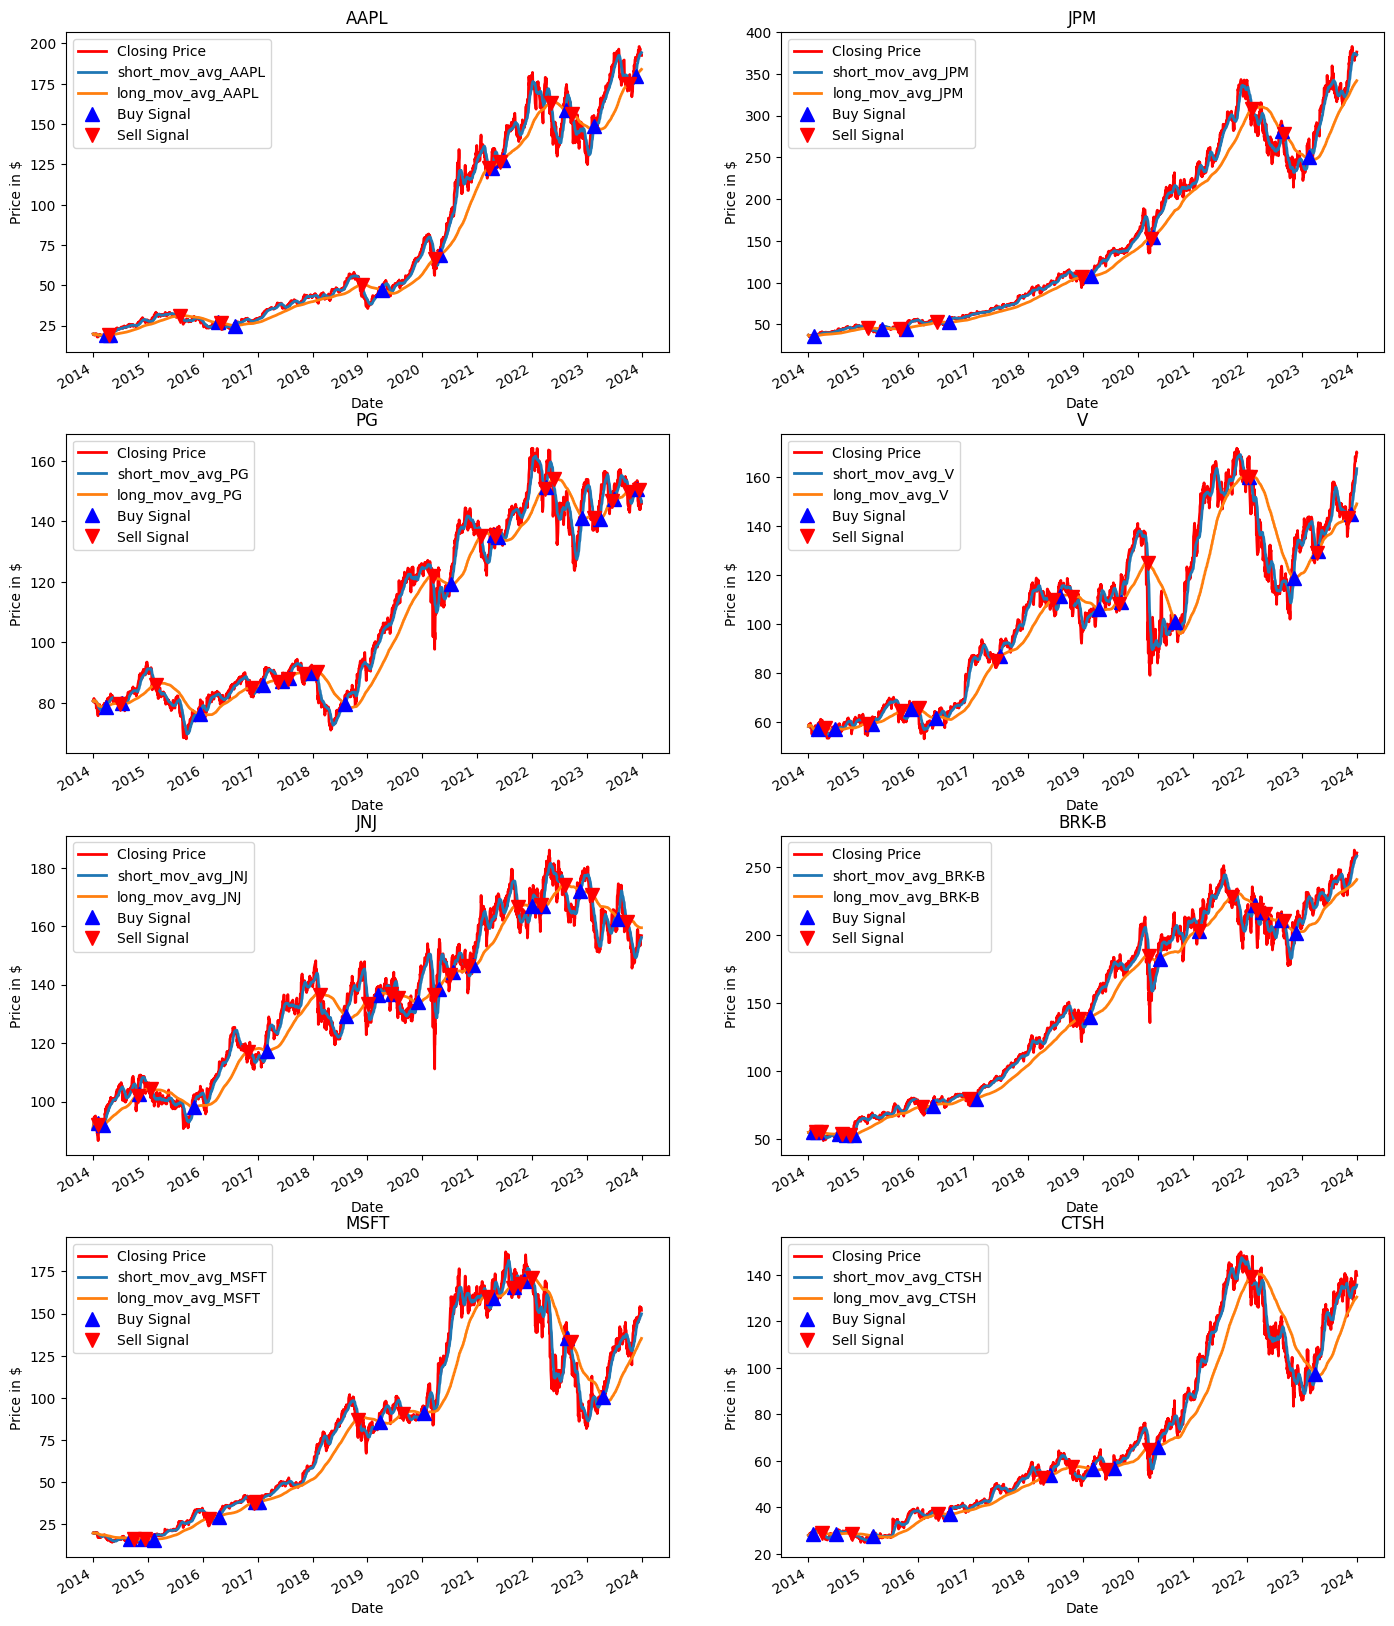

In [ ]:
import matplotlib.pyplot as plt

# Initialize the plot figure with a grid layout for subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
fig.tight_layout(pad=5.0)

stocklist = ['AAPL', 'JPM', 'PG', 'V', 'JNJ', 'BRK-B', 'MSFT', 'CTSH']

for i, stock in enumerate(stocklist):
    ax = axes[i // 2, i % 2]  # Get the subplot location from the grid
    ax.set_ylabel('Price in $')
    ax.set_title(stock)

    # Plot the closing price
    stk1[stock].plot(ax=ax, color='r', lw=2., label='Closing Price')

    # Plot the short and long moving averages
    signals[['short_mov_avg_' + stock, 'long_mov_avg_' + stock]].plot(ax=ax, lw=2.)

    # Plot the buy signals
    ax.plot(signals.loc[signals['positions' + stock] == 1.0].index,
            signals['long_mov_avg_' + stock][signals['positions' + stock] == 1.0],
            '^', markersize=10, color='blue', label='Buy Signal')

    # Plot the sell signals
    ax.plot(signals.loc[signals['positions' + stock] == -1.0].index,
            signals['short_mov_avg_' + stock][signals['positions' + stock] == -1.0],
            'v', markersize=10, color='red', label='Sell Signal')

    ax.legend()  # Add legend to each subplot

plt.show()


In [ ]:
signals

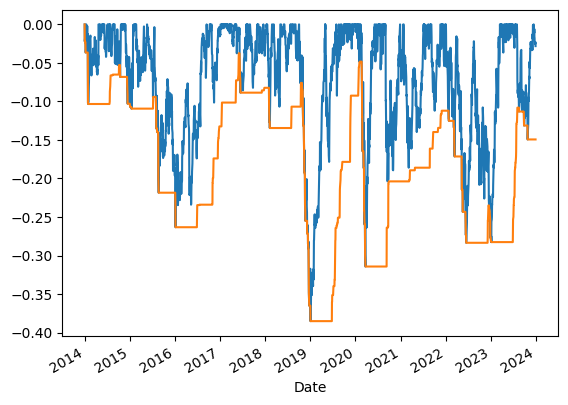

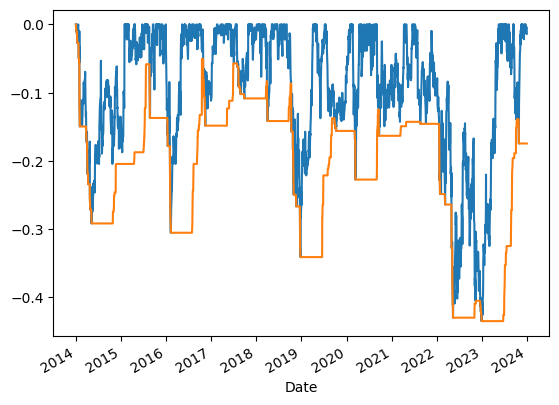

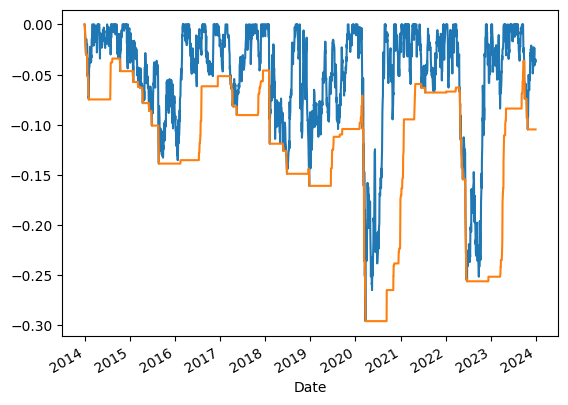

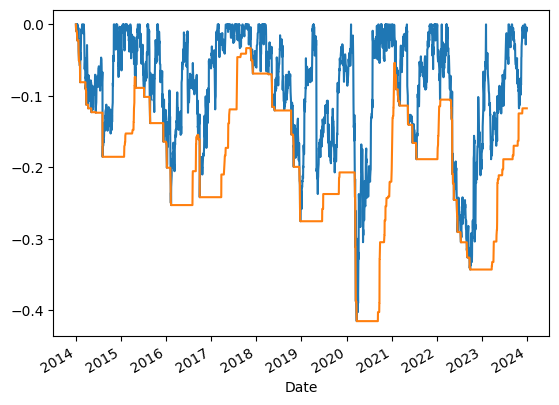

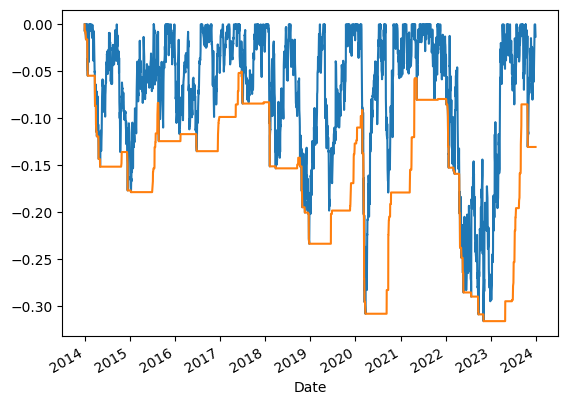

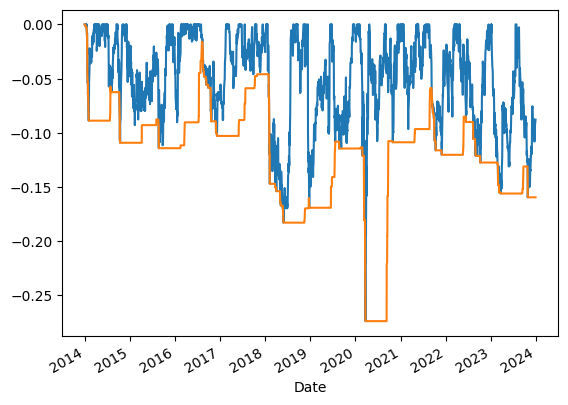

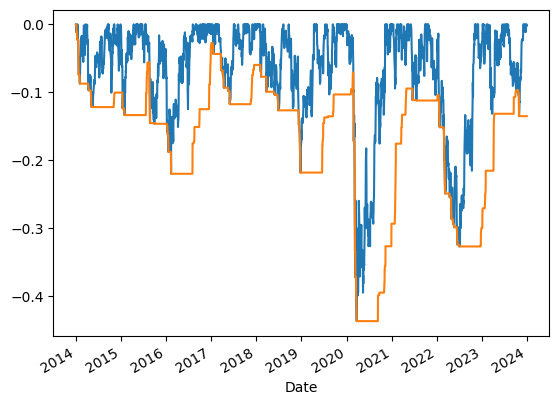

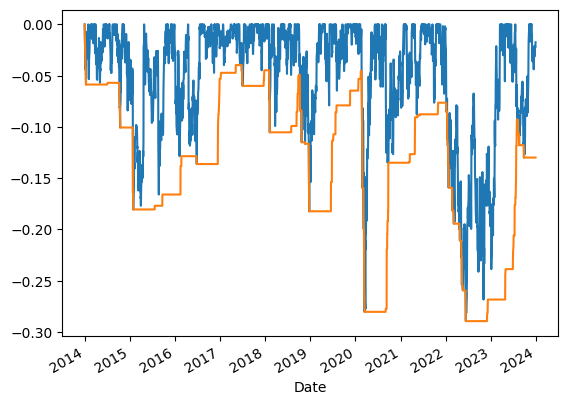

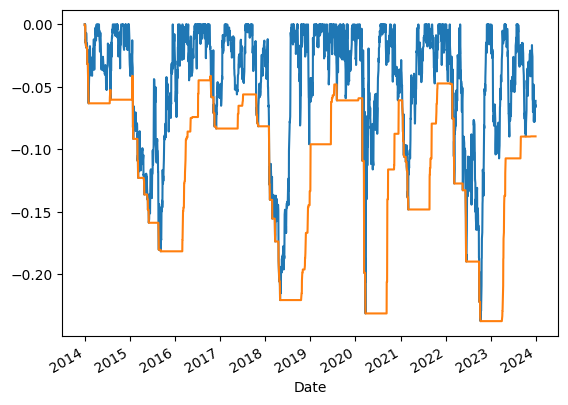

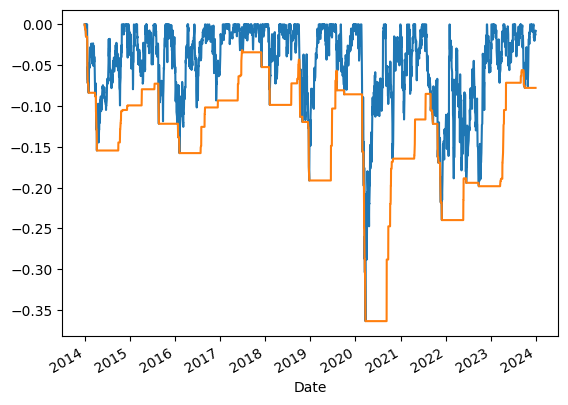

In [ ]:
window=120
for i in prices.columns:
  rolling_max = prices[i].rolling(window, min_periods=1).max()
  daily_drawdown = prices[i]/rolling_max - 1.0

# Calculate the minimum (negative) daily drawdown
  max_daily_drawdown = daily_drawdown.rolling(window, min_periods=1).min()

# Plot the results
  daily_drawdown.plot(label='daily drawdown of'+str(i))
  max_daily_drawdown.plot()

# Show the plot
  plt.show()



In [ ]:
# Optimzation

# Optimization

In [ ]:
import riskfolio as rp
import pandas as pd

# Assuming 'Y' is a DataFrame of returns
# Replace this with your actual returns data

# Building the portfolio object
port = rp.Portfolio(returns=Y)

# Estimate input parameters
method_mu = 'hist'  # Method to estimate expected returns based on historical data
method_cov = 'hist'  # Method to estimate covariance matrix based on historical data

port.assets_stats(method_mu=method_mu,
                  method_cov=method_cov,
                  d=0.94)

# Example 1: Optimize for Sharpe Ratio with a risk-free rate of 1%
model = 'Classic'
rm = 'MAD'
obj = 'Sharpe'
hist = True
rf = 0.01  # Risk-free rate of 1%
l = 0  # Not used in this case

w_sharpe = port.optimization(model=model,
                             rm=rm,
                             obj=obj,
                             rf=rf,
                             l=l,
                             hist=hist)

print("Optimized weights for Sharpe Ratio with rf=0.01:")
print(w_sharpe)

# Example 2: Optimize for Utility with moderate risk aversion and a risk-free rate of 2%
obj = 'Utility'
rf = 0.02  # Risk-free rate of 2%
l = 1  # Moderate risk aversion

w_utility = port.optimization(model=model,
                              rm=rm,
                              obj=obj,
                              rf=rf,
                              l=l,
                              hist=hist)

print("Optimized weights for Utility with rf=0.02 and l=1:")
print(w_utility)


/usr/local/lib/python3.10/dist-packages/cvxpy/reductions/solvers/solving_chain.py:354: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add an explicit dependency on ECOS or switch to our new
    default solver, Clarabel, by either not specifying a solver argument
    or specifying ``solver=cp.CLARABEL``.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


The problem doesn't have a solution with actual input parameters
Optimized weights for Sharpe Ratio with rf=0.01:
None
Optimized weights for Utility with rf=0.02 and l=1:
            weights
AAPL   7.359139e-02
MSFT   4.098112e-02
GOOGL  1.666088e-01
AMZN   2.467368e-08
CTSH   1.023161e-07
JNJ    2.633442e-01
V      4.632866e-02
JPM    3.790052e-02
PG     3.338459e-01
BRK-B  3.739923e-02


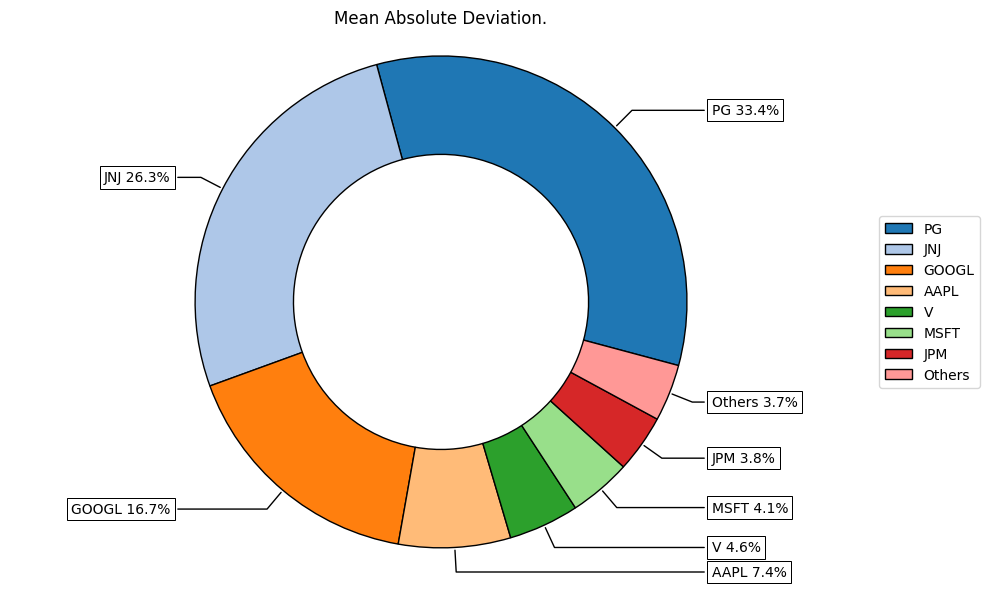

In [ ]:
ax = rp.plot_pie(w=w_utility, title='Mean Absolute Deviation.', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)